0
0
0
1
1
1
1
0
0
1
1
1
0
1
1
0
[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]
-0.19999999999999996


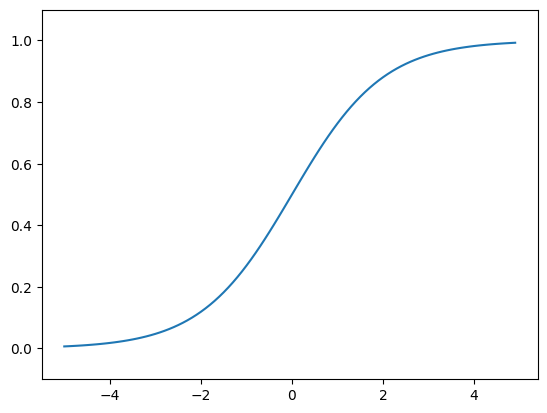

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [20]:
import pickle
import sys, os
from datasets.mnist import load_mnist
from percep import sigmoid, softmax

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

In [7]:
from PIL import Image
import numpy as np

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

img = x_train[0]
label = t_train[0]
print(label)

print(img.shape)
img = img.reshape(28,28)
print(img.shape)

img_show(img)

5
(784,)
(28, 28)


In [21]:
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open("datasets/sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)

    print(network)
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

In [23]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    print(y)
    p = np.argmax(y)
    print(p, "->", t[i])
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy: ", accuracy_cnt / len(x))

{'b2': array([-0.01471108, -0.07215131, -0.00155692,  0.12199665,  0.11603302,
       -0.00754946,  0.04085451, -0.08496164,  0.02898045,  0.0199724 ,
        0.19770803,  0.04365116, -0.06518728, -0.05226324,  0.0113163 ,
        0.03049979,  0.04060355,  0.0695399 , -0.07778469,  0.0692313 ,
       -0.09365533,  0.0548001 , -0.03843745,  0.02123107,  0.03793406,
       -0.02806267, -0.01818407,  0.06870425,  0.0542943 ,  0.0674368 ,
        0.06264312, -0.0233236 , -0.01589135,  0.01860516,  0.01839287,
       -0.01568104, -0.07422207, -0.01606729, -0.02262172, -0.01007509,
        0.0434415 , -0.12020151,  0.02802471, -0.07591944, -0.00533499,
       -0.08935217, -0.0181419 ,  0.0330689 , -0.01812706, -0.07689384,
       -0.02715412, -0.03847084, -0.05315471, -0.02153288,  0.06898243,
        0.02431128, -0.00333816,  0.00817491,  0.03911701, -0.02924617,
        0.07184725, -0.00356748,  0.02246175,  0.03987982, -0.04921926,
        0.02454282,  0.05875788,  0.08505439, -0.00190306